## traditional regression model
our goal is to adapt a straight line to our scatter plot (two columns of data) and the regression model formula is :
$Y_{i} = B_{0} + B_{1}X + \epsilon$
, Y is the target data  
, X input (independent)
 for finding out about $B_{0}$ and $B_{1}$ we minimize the least square error function (lse)
 and $\epsilon$ is the distance from the line to data points
 

### code of the traditional regression model
1. we import the needed libraries
   1. numpy to generate random numbers
   2. pandas : to handle data
   3. matplotlib: to get the ploting functionalities
   4. sklearn: provides linear regression model object
   5. statsmodel : alternative regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

- Create two lists of data (random)(with linear dependency)
- Put it in a dataframe
- Plot it !!

In [2]:
# create data
X_var = []
Y_var = []
for i in range(1,100):
    x = i + 15
    X_var.append(x + np.random.normal(loc=0.0 , scale=4.0))
    Y_var.append(x*1.5 + np.random.normal(loc=0.0 , scale=6.0))

In [7]:
# create df
reg_data = pd.DataFrame(list(zip(X_var , Y_var)) , columns = ['X','Y'])

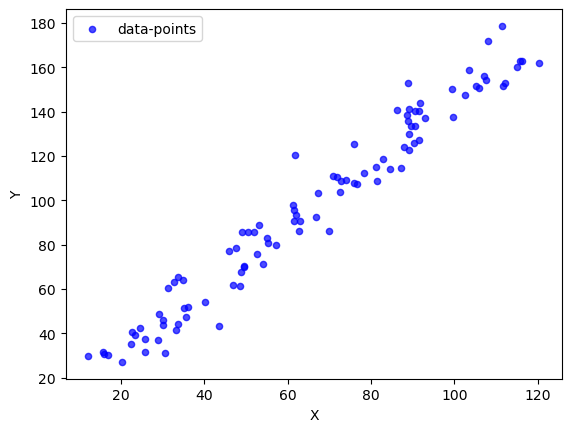

In [14]:
# plot
reg_data.plot(x='X' , y='Y', kind='scatter' , color = 'blue' ,  label='data-points' , alpha=0.7)
plt.legend(loc='upper left')
plt.show()

In [22]:
# convert dataframe to a suitable format that sklearn can accept (numpy arrays)
X = reg_data.iloc[: , 0].values.reshape(-1,1)
Y = reg_data.iloc[: , 1].values.reshape(-1,1)
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


#### After doing that we should *create* sklearn object and train it to predict the regression-line / hyperplane.

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)
reg_data['Y pred'] = regr.predict(X) # save pred to our DF 

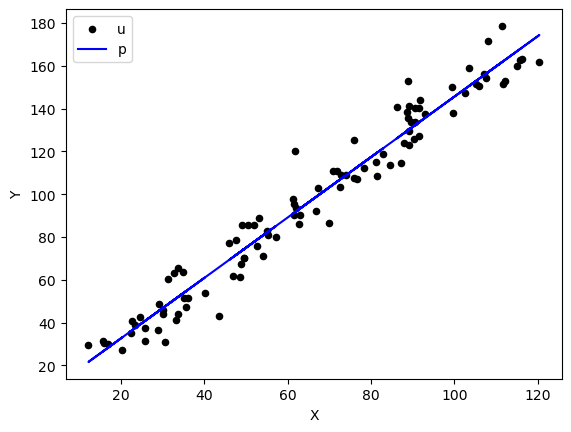

[4.47561993]
[[1.41189728]]


In [39]:
# plot our reg-line
ax = reg_data.plot(x = 'X' , y='Y' , kind='scatter' , color='black' , label='data points')
reg_data.plot(x = 'X' , y='Y pred' , kind='line' , color='blue' , label='reg line ' , ax=ax)
plt.legend('upper left')
plt.show()
print(regr.intercept_)
print(regr.coef_)

In [43]:
# alternative solution:
reg_model = smf.ols(formula = 'Y ~ X' , data=reg_data).fit()
reg_data['Y pred 2'] = reg_model.predict() 
print(reg_model.params)

Intercept    4.475620
X            1.411897
dtype: float64


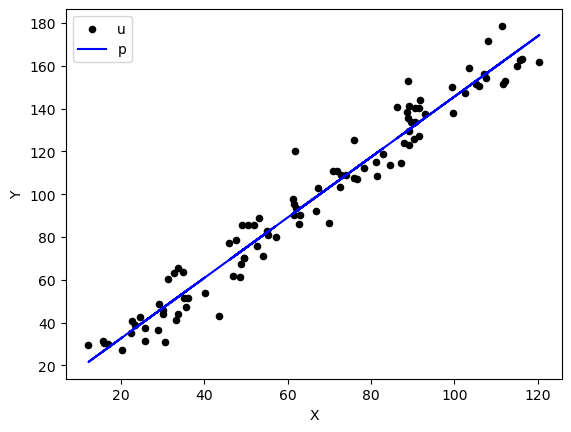

In [44]:
ax = reg_data.plot(x = 'X' , y='Y' , kind='scatter' , color='black' , label='data points')
reg_data.plot(x = 'X' , y='Y pred 2' , kind='line' , color='blue' , label='reg line ' , ax=ax)
plt.legend('upper left')
plt.show()